In [94]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv("zomato.csv")

In [96]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,stanbul,"Kemanke Karamustafa Pa a Mahallesi, R۱ht۱m ...",Karak _y,"Karak _y, stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A ac۱,208,stanbul,"Ko uyolu Mahallesi, Muhittin st _nda Cadd...",Ko uyolu,"Ko uyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A k Kahve,208,stanbul,"Kuru _e me Mahallesi, Muallim Naci Caddesi, N...",Kuru _e me,"Kuru _e me, stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [97]:
df.drop(["Locality Verbose"],axis=1,inplace=True)
df.drop(["Rating color"],axis=1,inplace=True)

In [98]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Very Good,270


In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
le=LabelEncoder()

In [101]:
df["Restaurant Name"]=le.fit_transform(df["Restaurant Name"])
df["City"]=le.fit_transform(df["City"])
df["Address"]=le.fit_transform(df["Address"])
df["Locality"]=le.fit_transform(df["Locality"])
df["Cuisines"]=le.fit_transform(df["Cuisines"])
df["Currency"]=le.fit_transform(df["Currency"])
df["Has Table booking"]=le.fit_transform(df["Has Table booking"])
df["Has Online delivery"]=le.fit_transform(df["Has Online delivery"])
df["Is delivering now"]=le.fit_transform(df["Is delivering now"])
df["Switch to order menu"]=le.fit_transform(df["Switch to order menu"])
df["Rating text"]=le.fit_transform(df["Rating text"])
df["Restaurant ID"]=le.fit_transform(df["Restaurant ID"])

In [102]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,4824,3750,162,74,8688,175,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,1,314
1,4814,3174,162,74,6057,597,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,1,591
2,4810,2899,162,76,4686,312,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,5,270
3,4827,4708,162,76,8693,866,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,1,365
4,4820,5524,162,76,8692,866,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4444,208,0,5930,522,28.977392,41.022793,1813,80,11,0,0,0,0,3,4.1,5,788
9547,4748,1313,208,0,5962,547,29.041297,41.009847,1824,105,11,0,0,0,0,3,4.2,5,1034
9548,4752,3071,208,0,5970,559,29.034640,41.055817,1110,170,11,0,0,0,0,4,3.7,2,661
9549,4754,87,208,0,5971,559,29.036019,41.057979,1657,120,11,0,0,0,0,4,4.0,5,901


In [103]:
df.dtypes

Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating text               int32
Votes                     int64
dtype: object

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   int32  
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   int32  
 4   Address               9551 non-null   int32  
 5   Locality              9551 non-null   int32  
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9551 non-null   int32  
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   int32  
 11  Has Table booking     9551 non-null   int32  
 12  Has Online delivery   9551 non-null   int32  
 13  Is delivering now     9551 non-null   int32  
 14  Switch to order menu  9551 non-null   int32  
 15  Price range          

In [105]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

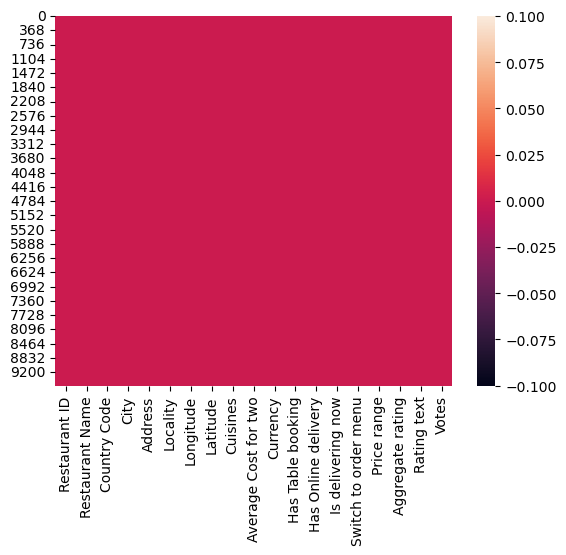

In [106]:
sns.heatmap(df.isnull())

No null data is found in dataset(df)

In [107]:
df.corr()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
Restaurant ID,1.000000,0.006421,0.049831,-0.008685,0.144846,0.087619,-0.124933,-0.135971,-0.060138,0.006025,-0.023397,-0.142106,-0.111915,0.021313,NaN,-0.151695,-0.402260,0.269438,-0.190269
Restaurant Name,0.006421,1.000000,0.018585,0.001115,0.000947,0.004075,-0.001568,0.009377,0.051283,0.019268,0.006483,0.041336,0.028189,0.012009,NaN,0.060662,0.028800,0.011271,0.018307
Country Code,0.049831,0.018585,1.000000,-0.209694,-0.222896,-0.124475,-0.698299,0.019792,-0.129457,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,0.222685,0.154530
City,-0.008685,0.001115,-0.209694,1.000000,-0.021126,0.110144,0.126146,-0.013215,0.025143,-0.028116,-0.137874,-0.000305,0.018196,-0.013450,NaN,-0.116768,-0.141329,-0.105967,-0.092280
Address,0.144846,0.000947,-0.222896,-0.021126,1.000000,0.158402,0.186384,-0.039630,0.022254,0.022807,0.063629,0.006702,0.030318,0.031311,NaN,-0.035541,-0.151737,-0.008334,-0.101717
Locality,0.087619,0.004075,-0.124475,0.110144,0.158402,1.000000,0.090676,-0.017422,0.006310,-0.011933,0.018173,-0.064632,-0.029511,-0.007148,NaN,-0.117616,-0.176110,-0.038477,-0.123040
Longitude,-0.124933,-0.001568,-0.698299,0.126146,0.186384,0.090676,1.000000,0.043207,0.122459,0.045891,0.337334,0.100488,0.178757,0.018787,NaN,-0.078939,-0.116818,-0.181466,-0.085101
Latitude,-0.135971,0.009377,0.019792,-0.013215,-0.039630,-0.017422,0.043207,1.000000,0.038643,-0.111088,-0.101864,0.054658,0.118722,0.015001,NaN,-0.166688,0.000516,-0.129447,-0.022962
Cuisines,-0.060138,0.051283,-0.129457,0.025143,0.022254,0.006310,0.122459,0.038643,1.000000,0.005757,0.066773,0.050230,-0.017180,0.007707,NaN,-0.005492,-0.079493,-0.080024,-0.032365
Average Cost for two,0.006025,0.019268,0.043225,-0.028116,0.022807,-0.011933,0.045891,-0.111088,0.005757,1.000000,0.045615,0.007758,-0.018974,-0.001862,NaN,0.075083,0.051792,0.031439,0.067783


<AxesSubplot:>

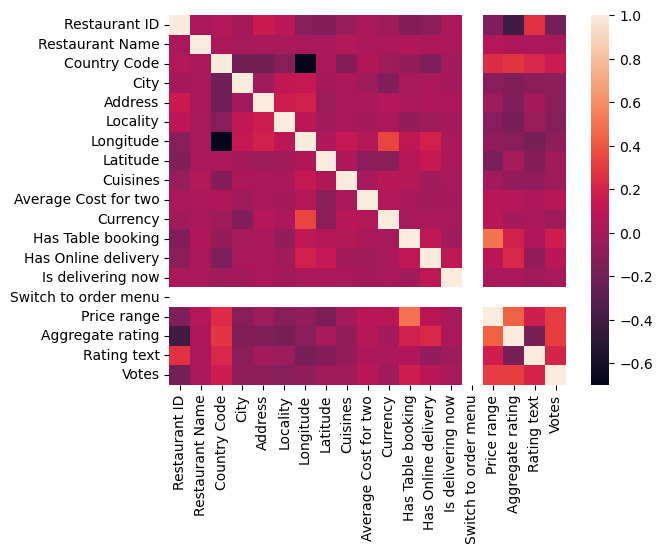

In [108]:
sns.heatmap(df.corr())

No negative correlation in dataset

In [109]:
df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0,9551.000000,9551.000000,9551.000000,9551.000000
mean,4775.000000,3653.528217,18.365616,79.088158,4542.589048,661.457334,64.126574,25.854381,989.953408,1199.210763,3.977699,0.121244,0.256622,0.003560,0.0,1.804837,2.666370,1.788713,156.909748
std,2757.280544,2142.767174,56.750546,23.266005,2565.792781,315.944034,41.467058,11.007935,514.722387,16121.183073,0.914242,0.326428,0.436792,0.059561,0.0,0.905609,1.516378,1.694637,430.169145
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
25%,2387.500000,1777.500000,1.000000,77.000000,2323.500000,386.000000,77.081343,28.478713,497.000000,250.000000,4.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,0.000000,5.000000
50%,4775.000000,3595.000000,1.000000,89.000000,4610.000000,700.000000,77.191964,28.570469,1127.000000,400.000000,4.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,31.000000
75%,7162.500000,5485.500000,1.000000,89.000000,6746.500000,924.000000,77.282006,28.642758,1355.000000,700.000000,4.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,3.000000,131.000000
max,9550.000000,7445.000000,216.000000,140.000000,8917.000000,1207.000000,174.832089,55.976980,1825.000000,800000.000000,11.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,10934.000000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max

In [110]:
df.skew()

Restaurant ID            0.000000
Restaurant Name          0.044757
Country Code             3.043965
City                    -1.243427
Address                 -0.040419
Locality                -0.255567
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305498
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating text              0.431408
Votes                    8.807637
dtype: float64

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

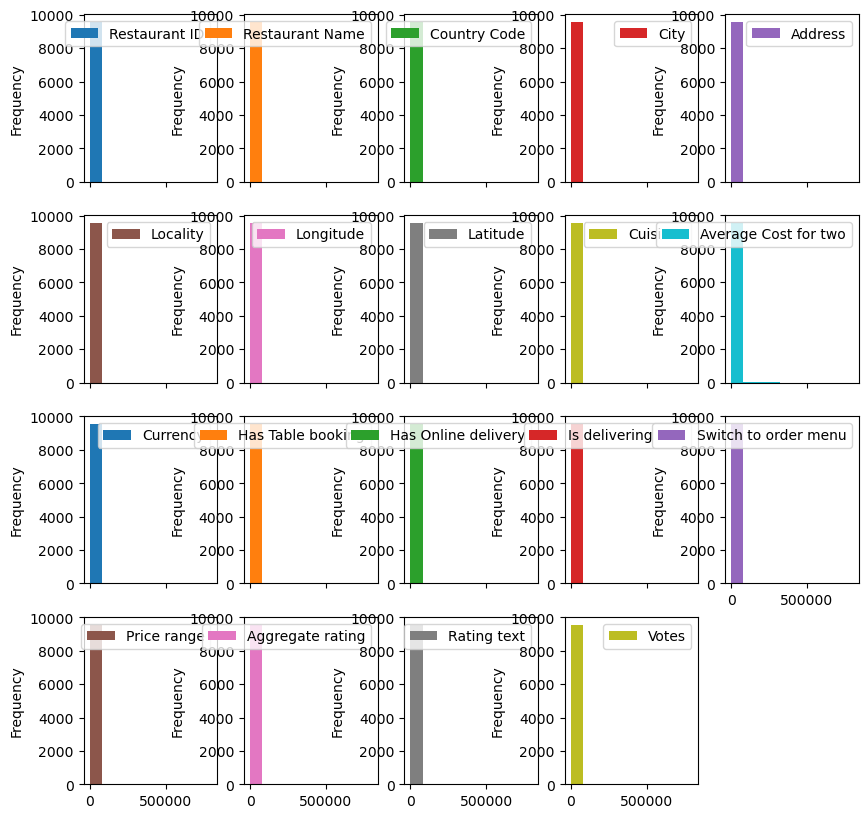

In [114]:
df.plot(kind="hist",subplots=True,layout=(4,5),figsize=(10,10))

No skewness is found in dataset(df)

Restaurant ID              AxesSubplot(0.125,0.712609;0.133621x0.167391)
Restaurant Name         AxesSubplot(0.285345,0.712609;0.133621x0.167391)
Country Code             AxesSubplot(0.44569,0.712609;0.133621x0.167391)
City                    AxesSubplot(0.606034,0.712609;0.133621x0.167391)
Address                 AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Locality                   AxesSubplot(0.125,0.511739;0.133621x0.167391)
Longitude               AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Latitude                 AxesSubplot(0.44569,0.511739;0.133621x0.167391)
Cuisines                AxesSubplot(0.606034,0.511739;0.133621x0.167391)
Average Cost for two    AxesSubplot(0.766379,0.511739;0.133621x0.167391)
Currency                    AxesSubplot(0.125,0.31087;0.133621x0.167391)
Has Table booking        AxesSubplot(0.285345,0.31087;0.133621x0.167391)
Has Online delivery       AxesSubplot(0.44569,0.31087;0.133621x0.167391)
Is delivering now        AxesSubplot(0.606034,0.310

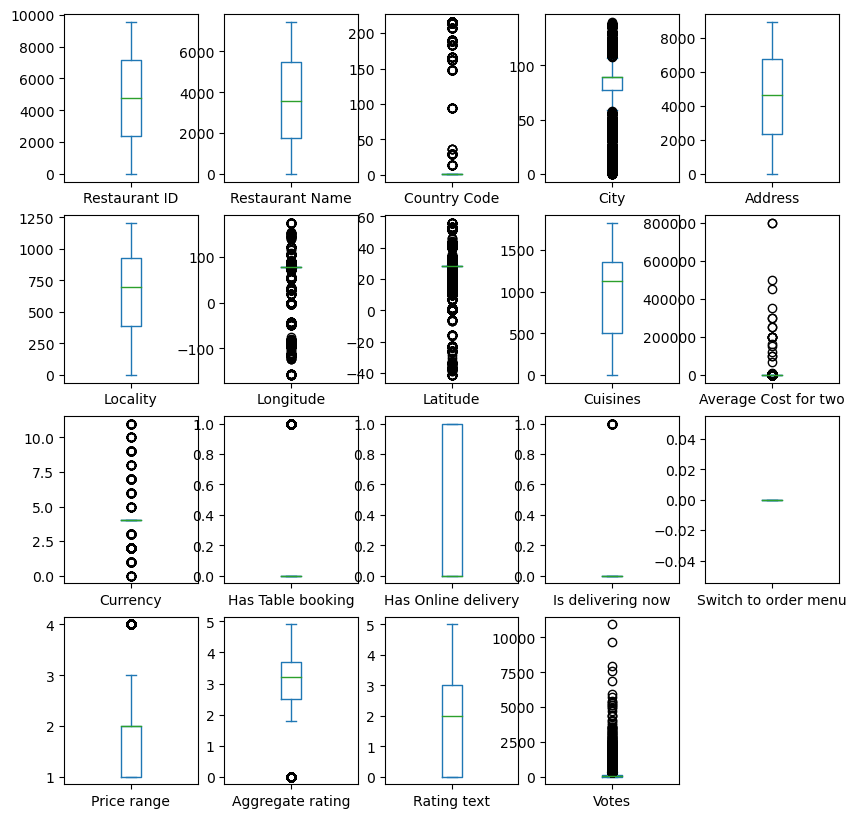

In [130]:
df.plot(kind="box",subplots=True,layout=(4,5),figsize=(10,10))

From this above visualization we get to know that outliers are present in dataset(df)

In [131]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
0,4824,3750,162,74,8688,175,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,1,314
1,4814,3174,162,74,6057,597,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,1,591
2,4810,2899,162,76,4686,312,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,5,270
3,4827,4708,162,76,8693,866,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,1,365
4,4820,5524,162,76,8692,866,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4444,208,0,5930,522,28.977392,41.022793,1813,80,11,0,0,0,0,3,4.1,5,788
9547,4748,1313,208,0,5962,547,29.041297,41.009847,1824,105,11,0,0,0,0,3,4.2,5,1034
9548,4752,3071,208,0,5970,559,29.034640,41.055817,1110,170,11,0,0,0,0,4,3.7,2,661
9549,4754,87,208,0,5971,559,29.036019,41.057979,1657,120,11,0,0,0,0,4,4.0,5,901


Training model for predicting Price Range

In [132]:
column=["Average Cost for two",'Price range']

In [133]:
x=df.drop(columns=column)

In [134]:
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating text,Votes
0,4824,3750,162,74,8688,175,121.027535,14.565443,920,0,1,0,0,0,4.8,1,314
1,4814,3174,162,74,6057,597,121.014101,14.553708,1111,0,1,0,0,0,4.5,1,591
2,4810,2899,162,76,4686,312,121.056831,14.581404,1671,0,1,0,0,0,4.4,5,270
3,4827,4708,162,76,8693,866,121.056475,14.585318,1126,0,0,0,0,0,4.9,1,365
4,4820,5524,162,76,8692,866,121.057508,14.584450,1122,0,1,0,0,0,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4444,208,0,5930,522,28.977392,41.022793,1813,11,0,0,0,0,4.1,5,788
9547,4748,1313,208,0,5962,547,29.041297,41.009847,1824,11,0,0,0,0,4.2,5,1034
9548,4752,3071,208,0,5970,559,29.034640,41.055817,1110,11,0,0,0,0,3.7,2,661
9549,4754,87,208,0,5971,559,29.036019,41.057979,1657,11,0,0,0,0,4.0,5,901


In [135]:
y=df["Price range"]

In [144]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.27,random_state=42)

In [145]:
xtrain.shape

(6972, 17)

In [146]:
ytrain.shape

(6972,)

In [147]:
lg=LogisticRegression()

In [148]:
lg

LogisticRegression()

In [149]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [150]:
lpred=lg.predict(xtest)

In [152]:
print("Accuracy score",accuracy_score(ytest,lpred))
print("confusion matrix",confusion_matrix(ytest,lpred))
print("Classification report",classification_report(ytest,lpred))

Accuracy score 0.5397440868553703
confusion matrix [[1082   94   35    2]
 [ 563  214   65    0]
 [ 116  149   94    1]
 [  71   64   27    2]]
Classification report               precision    recall  f1-score   support

           1       0.59      0.89      0.71      1213
           2       0.41      0.25      0.31       842
           3       0.43      0.26      0.32       360
           4       0.40      0.01      0.02       164

    accuracy                           0.54      2579
   macro avg       0.46      0.35      0.34      2579
weighted avg       0.50      0.54      0.48      2579



In [153]:
p=np.array([4824,3750,162,74,8688,175,121.027535,14.565443,920,0,1,0,0,0,4.8,1,314])

In [154]:
p=p.reshape(1,-1)

In [155]:
lg.predict(p)

array([3], dtype=int64)

In [156]:
p1=np.array([4814,3174,162,74,6057,597,121.014101,14.553708,1111,0,1,0,0,0,4.5,1,591])

In [157]:
p1=p1.reshape(1,-1)

In [158]:
lg.predict(p1)

array([3], dtype=int64)

The model is predicting the value of price range perfectely

hence the model is well trainied and working fine


Training model for predicting  Average Cost for two

In [159]:
a=x

In [160]:
a

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating text,Votes
0,4824,3750,162,74,8688,175,121.027535,14.565443,920,0,1,0,0,0,4.8,1,314
1,4814,3174,162,74,6057,597,121.014101,14.553708,1111,0,1,0,0,0,4.5,1,591
2,4810,2899,162,76,4686,312,121.056831,14.581404,1671,0,1,0,0,0,4.4,5,270
3,4827,4708,162,76,8693,866,121.056475,14.585318,1126,0,0,0,0,0,4.9,1,365
4,4820,5524,162,76,8692,866,121.057508,14.584450,1122,0,1,0,0,0,4.8,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4751,4444,208,0,5930,522,28.977392,41.022793,1813,11,0,0,0,0,4.1,5,788
9547,4748,1313,208,0,5962,547,29.041297,41.009847,1824,11,0,0,0,0,4.2,5,1034
9548,4752,3071,208,0,5970,559,29.034640,41.055817,1110,11,0,0,0,0,3.7,2,661
9549,4754,87,208,0,5971,559,29.036019,41.057979,1657,11,0,0,0,0,4.0,5,901


In [162]:
b=df["Average Cost for two"]

In [177]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=.27,random_state=46)

In [178]:
atrain.shape

(6972, 17)

In [179]:
btrain.shape

(6972,)

In [180]:
lg.fit(atrain,btrain)

LogisticRegression()

In [181]:
lg_p=lg.predict(atest)

In [182]:
print("Accuracy score",accuracy_score(btest,lg_p))
print("confusion matrix",confusion_matrix(btest,lg_p))
print("Classification report",classification_report(btest,lg_p))

Accuracy score 0.1264055835595192
confusion matrix [[0 1 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
          10       0.19      0.15      0.17        26
          20       0.00      0.00      0.00         7
          25       0.30      0.74      0.42        53
          30       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         3
          40       0.00      0.00      0.00        30
          45       0.00      0.00      0.00         3
          50       0.00      0.00      0.00        12
          55       0.00      0.00      0.00         6
          60       0.00      0.00      0.00         6
          65       0.00      0.00      0.00         2
          70       0.00      0.00      0.00        14
          75       0.00      0.00      0.00       

In [183]:
lg.predict(p)

array([500], dtype=int64)

In [185]:
dtc=DecisionTreeClassifier()

In [186]:
dtc

DecisionTreeClassifier()

In [187]:
dtc.fit(atrain,btrain)

DecisionTreeClassifier()

In [188]:
dtpred=dtc.predict(atest)

In [189]:
print(accuracy_score(btest,dtpred))
print(confusion_matrix(btest,dtpred))
print(classification_report(btest,dtpred))

0.1814656843737883
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.17      0.22         6
           7       0.00      0.00      0.00         0
          10       0.26      0.35      0.30        26
          15       0.00      0.00      0.00         0
          20       1.00      0.29      0.44         7
          25       0.48      0.42      0.44        53
          30       0.00      0.00      0.00         2
          35       0.17      0.33      0.22         3
          40       0.13      0.13      0.13        30
          45       0.17      0.33      0.22         3
          50       0.07      0.08      0.07        12
          55       0.00      0.00      0.00         6
          60       0.00      0.00      0.00         6
          65       0.00      0.00      0.00         2
          70       0.00      0.00      0.00       

In [190]:
dtc.predict(p)

array([1100], dtype=int64)

In [191]:
dtc.predict(p1)

array([1200], dtype=int64)

for predicting the value of Average Cost for two dtc model is working best

so dtc model is trained in prediction of Average Cost for two .